## <font color = 'brown'>Importing Library</font>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

## <font color = 'brown'>Gathering Data</font>

In [2]:
house_df= pd.read_csv('bengaluru_house_prices.csv')
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house_df.shape

(13320, 9)

In [4]:
house_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**important steps to do** 
- 1.in size columns we will consider only  all numeric value bcoz bedrooms and BHK have same meaning
- 2.total sqft should be in numeric

## <font color = 'brown'>Missing Values</font>

In [6]:
(100*house_df.isna().sum() / len(house_df))

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

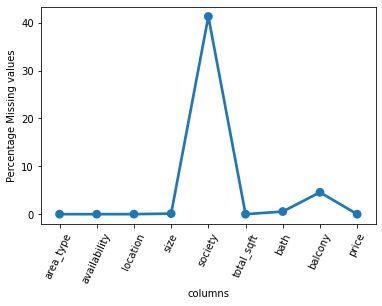

In [7]:
a = (100*house_df.isna().sum() / len(house_df)).reset_index()
a.columns = ['columns' , 'Percentage Missing values']
sns.pointplot(x='columns' , y= 'Percentage Missing values' , data = a)
plt.xticks(rotation = 65)
plt.show()

**Plot Insights**

- society colulmns has 41% missing values. we will drop this
- bath and balcony has missing values but less than 5% . by using mean , meandina we will impute that missng values

In [54]:
df = house_df.copy()

**Dropping Columns**

In [55]:
df = df.drop(['availability' , 'society' , 'area_type'] , axis = 1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [57]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [58]:
df = df.dropna(axis = 0 )

In [59]:
df['size'] = df['size'].str.split(' ').str[0].astype('int')

In [60]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

some values are in given in terms of range '1133 - 1384'

Lets find those range values

In [61]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [62]:
df[~(df['total_sqft'].apply(is_float))].head(20)

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,0.0,63.770
648,Arekere,9,4125Perch,9.0,2.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,0.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,0.0,445.000


There are some values which are also in some units but here i will simply delete those.

In [63]:
def sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0] )+ float(tokens[1])) /2
    try:
        return float(x)
    except:
        return None

In [64]:
df["total_sqft"] = df["total_sqft"].apply(sqft)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  int32  
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   balcony     13246 non-null  float64
 5   price       13246 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 672.6+ KB


In [66]:
house_df.shape , df.shape

((13320, 9), (13246, 6))

In [67]:
df = df.dropna(axis = 0 )

In [68]:
df.describe()

,size,total_sqft,bath,balcony,price
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,2.800833,1555.302783,2.691136,1.602348,112.276178
std,1.292843,1237.323445,1.338915,0.804268,149.175995
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1275.000000,2.000000,2.000000,71.850000
75%,3.000000,1672.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


## <font color = 'brown'>Feature Engineering </font>

In [69]:
df['price_per_sqft'] =df['price']*100000/ df['total_sqft']

<h2 style="color:blue">Dimensionality Reduction</h2>
**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [70]:
df['location'] = df['location'].str.strip()
location_stats = df.location.value_counts()
location_data_less_10 =location_stats[location_stats<=10].index
location_data_less_10

Index(['Dodsworth Layout', 'Sadashiva Nagar', 'Thyagaraja Nagar',
       'Ganga Nagar', 'Nagadevanahalli', 'Naganathapura', 'Basapura',
       'BTM 1st Stage', 'Dairy Circle', 'Nagappa Reddy Layout',
       ...
       'Mathikere SBM colony', '1Hanuman Nagar', 'Ashraya Layout',
       'Deepanjali Nagar', 'Bidere Agarahara, Behind Safal market',
       'Shirdi Sai Nagar', 'Attiguppe', 'Udayagiri', 'Virudhu Nagar',
       'RR Nagar'],
      dtype='object', length=1047)

In [71]:
df['location'].nunique()


1287

In [72]:
df['location'] = df['location'].replace(location_data_less_10 , 'Other')

In [73]:
df['location'].nunique()

241

## <font color = 'brown'>Exploratory Data Analysis </font>

In [74]:
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


<AxesSubplot:>

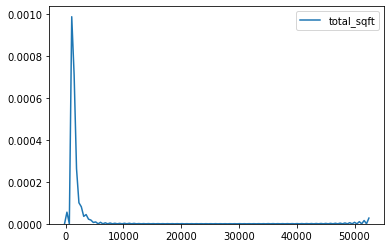

In [75]:
sns.kdeplot(df['total_sqft'])

Maximum sqft area is between 0 to 5000

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

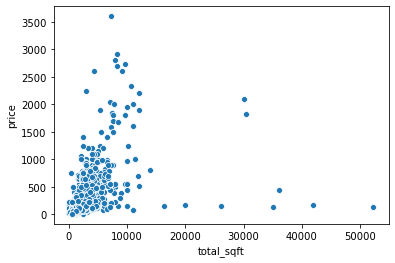

In [76]:
sns.scatterplot(x = 'total_sqft' ,y = 'price' , data =df)

In [77]:
import plotly.express as px 
px.scatter(x=df['total_sqft'] ,y =df['price'] , trendline = 'ols')

<AxesSubplot:>

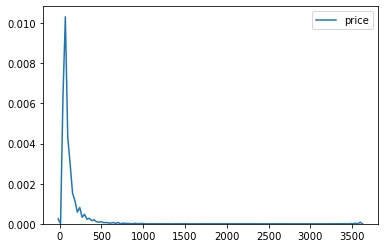

In [78]:
sns.kdeplot(df['price'])

## <font color = 'brown'>Exploratory Data Analysis </font>

In [79]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price',
       'price_per_sqft'],
      dtype='object')

In [80]:
# cols = ['size', 'total_sqft', 'bath', 'balcony',
#        'price']
# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3-Q1
# upper_limit = Q3 + 1.5 * IQR
# lower_limit = Q1 - 1.5 * IQR
# print("Upper limit",upper_limit)
# print("Lower limit",lower_limit)

In [81]:
# df[((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)] 

In [82]:
df.shape

(13200, 7)

- As per AERA the minimum carpet area for 2 BHK is 300 square feet.

In [83]:
df[df['total_sqft']/df['size']<300].head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Other,6,1020.0,6.0,2.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,2.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,6296.296296
70,Other,3,500.0,3.0,2.0,100.0,20000.000000


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [84]:
df = df[~(df['total_sqft']/df['size']<300)] 

In [85]:
df.shape

(12456, 7)

In [86]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**75% values are less than 6919 but maximum is 176470 here we can clearly see there are wide variation price per sqft**

In [89]:
cols = ['price_per_sqft']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit price_per_sqft    10975.877193
dtype: float64
Lower limit price_per_sqft    151.315789
dtype: float64


In [90]:
df = df[(df['price_per_sqft']>151.315789) & (df['price_per_sqft']<=10975.877193)]

In [91]:
df['price_per_sqft'].describe()

count    11453.000000
mean      5413.464008
std       1758.555400
min        267.829813
25%       4123.711340
50%       5100.483092
75%       6412.478336
max      10967.098704
Name: price_per_sqft, dtype: float64

<AxesSubplot:xlabel='price_per_sqft'>

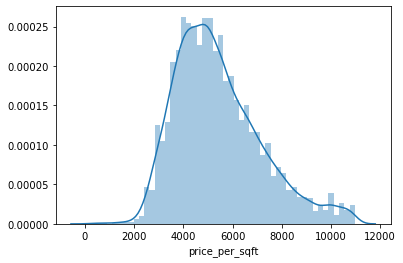

In [92]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:>

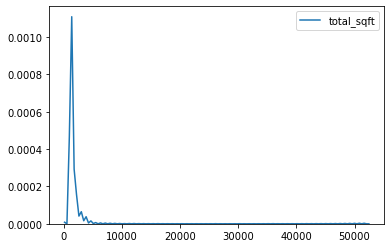

In [96]:
sns.kdeplot(df['total_sqft']) 

<AxesSubplot:xlabel='total_sqft', ylabel='price_per_sqft'>

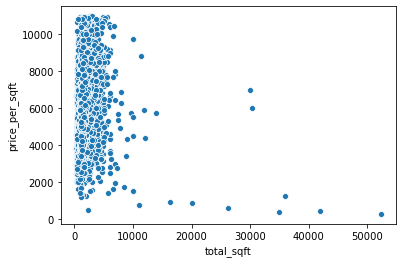

In [97]:
sns.scatterplot(x = 'total_sqft' , y ='price_per_sqft' , data = df)  

In [109]:
df = df[~(df['total_sqft']>=20000)] 
df.shape

(11445, 7)

- for 3 bhk apartment total_sqft is more than 35000 sqft this is not possible.this is errors

<AxesSubplot:xlabel='total_sqft', ylabel='price_per_sqft'>

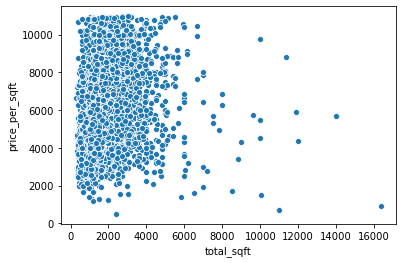

In [111]:
sns.scatterplot(x = 'total_sqft' , y ='price_per_sqft' , data = df)  